100%|██████████| 170M/170M [00:03<00:00, 54.3MB/s]


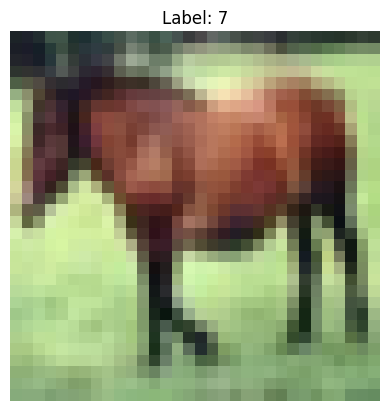

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

example_img, label = trainset[7]
img = example_img.numpy().transpose(1, 2, 0) # 32 x 32

plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [ ]:
X_train = np.array([np.array(img).flatten() for img, _ in trainset])
y_train = np.array([label for _, label in trainset])
X_test = np.array([np.array(img).flatten() for img, _ in testset])
y_test = np.array([label for _, label in testset])

number of components:10, the sum explained variance: 0.655015230178833
number of components:20, the sum explained variance: 0.744541585445404
number of components:30, the sum explained variance: 0.7925849556922913
number of components:40, the sum explained variance: 0.8221219182014465
number of components:50, the sum explained variance: 0.8429635167121887
number of components:60, the sum explained variance: 0.8592146039009094
number of components:70, the sum explained variance: 0.8725200891494751
number of components:80, the sum explained variance: 0.8835394382476807
number of components:90, the sum explained variance: 0.8929433226585388
number of components:100, the sum explained variance: 0.9009815454483032
number of components:110, the sum explained variance: 0.9079110622406006
number of components:120, the sum explained variance: 0.9140055179595947
number of components:130, the sum explained variance: 0.9195317625999451
number of components:140, the sum explained variance: 0.924367

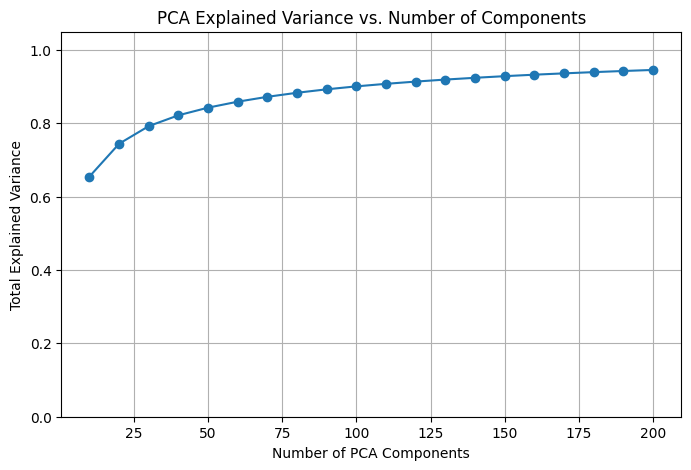

In [ ]:
# PCA
pca_results = []
n_components = list(range(10, 210, 10))
for n_comp in n_components:
  pca = PCA(n_components=n_comp)
  X_train_pca_tmp = pca.fit_transform(X_train)
  X_test_pca_tmp = pca.transform(X_test)
  pca_result = np.sum(pca.explained_variance_ratio_)
  pca_results.append(pca_result)
  print(f"number of components:{n_comp}, the sum explained variance: {pca_result}")

plt.figure(figsize=(8, 5))
plt.plot(n_components, pca_results, marker='o')
plt.title("PCA Explained Variance vs. Number of Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Total Explained Variance")
plt.grid(True)
plt.ylim(0, 1.05)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

def report(log, y_test, y_pred, y_prob):
  print(f"Results of {log}:")
  acc = accuracy_score(y_test, y_pred)
  loss = log_loss(y_test, y_prob)

  print(f"Accuracy: {acc:.2f}")
  print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")

  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  print("Classification Report:")
  print(classification_report(y_test, y_pred, target_names=testset.classes))

In [ ]:
# Logistic Regression
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
y_prob = clf.predict_proba(X_test_pca)
report("Logistic Regression: ", y_test, y_pred, y_prob)

Results of Logistic Regression: :
Accuracy: 0.41
Log Loss (Cross-Entropy Loss): 1.7122
Confusion Matrix:
[[483  44  53  35  21  32  26  50 181  75]
 [ 62 479  24  33  27  34  35  62  77 167]
 [104  40 271  82 114  85 154  83  47  20]
 [ 41  61  95 281  52 173 126  61  48  62]
 [ 61  26 146  60 296  87 166 104  25  29]
 [ 48  45 105 153  69 345  89  75  46  25]
 [ 12  34  78 131  84  76 509  35  15  26]
 [ 46  48  64  56  91  84  57 443  39  72]
 [177  68  18  25  11  50  13  19 527  92]
 [ 78 182  23  26  18  25  46  48  86 468]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.43      0.48      0.46      1000
  automobile       0.47      0.48      0.47      1000
        bird       0.31      0.27      0.29      1000
         cat       0.32      0.28      0.30      1000
        deer       0.38      0.30      0.33      1000
         dog       0.35      0.34      0.35      1000
        frog       0.42      0.51      0.46      1000
       h

In [ ]:
# logistic regression without PCA
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)
report("Logistic Regression Without PCA", y_test, y_pred, y_prob)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results of Logistic Regression Without PCA:
Accuracy: 0.39
Log Loss (Cross-Entropy Loss): 1.7926
Confusion Matrix:
[[480  40  59  37  25  29  24  57 179  70]
 [ 65 455  38  35  34  43  33  49  74 174]
 [ 99  38 282  93 125  88 127  78  44  26]
 [ 43  45 101 241  66 208 141  48  39  68]
 [ 61  27 134  64 292 102 160 105  31  24]
 [ 30  41 110 179  87 309  81  79  46  38]
 [ 20  38  80 135 105  96 445  42  16  23]
 [ 42  44  74  67 100  90  40 425  39  79]
 [151  74  26  26  16  45  17  16 527 102]
 [ 72 179  19  38  26  26  48  68  79 445]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.45      0.48      0.47      1000
  automobile       0.46      0.46      0.46      1000
        bird       0.31      0.28      0.29      1000
         cat       0.26      0.24      0.25      1000
        deer       0.33      0.29      0.31      1000
         dog       0.30      0.31      0.30      1000
        frog       0.40      0.45      0.42      100

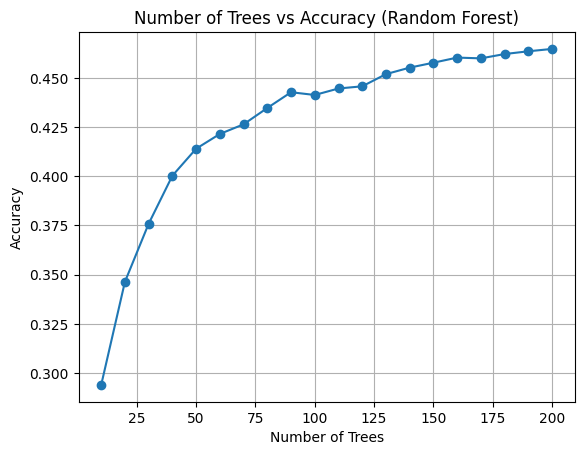

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
accuracies = []
tree_counts = np.arange(10, 210, 10)
for n in tree_counts:
  rf = RandomForestClassifier(n_estimators=n, random_state=42)
  rf.fit(X_train_pca, y_train)
  rf_pred = rf.predict(X_test_pca)
  accuracies.append(accuracy_score(y_test, rf_pred))
plt.plot(tree_counts, accuracies, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees vs Accuracy (Random Forest)')
plt.grid(True)
plt.show()

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_pca, y_train)
rf_pred = rf.predict(X_test_pca)
rf_prob = rf.predict_proba(X_test_pca)
report("Random Forest", y_test, rf_pred, rf_prob)


Results of Random Forest:
Accuracy: 0.41
Log Loss (Cross-Entropy Loss): 1.8970
Confusion Matrix:
[[524  49  57  44  32  28  29  35 151  51]
 [ 52 535  27  42  13  40  26  41  67 157]
 [121  42 294 107 171  53  95  53  35  29]
 [ 57  62  90 279  69 179 100  63  39  62]
 [ 66  25 170  69 345  65 137  69  35  19]
 [ 58  52  92 210  68 300  77  76  22  45]
 [ 19  50 109 103 124  62 462  32  20  19]
 [ 61  51  69  90  87 102  57 334  34 115]
 [141  97  18  40  17  36  18  18 547  68]
 [ 66 200  27  46  19  30  31  58  80 443]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.45      0.52      0.48      1000
  automobile       0.46      0.54      0.49      1000
        bird       0.31      0.29      0.30      1000
         cat       0.27      0.28      0.27      1000
        deer       0.37      0.34      0.35      1000
         dog       0.34      0.30      0.32      1000
        frog       0.45      0.46      0.45      1000
       horse    

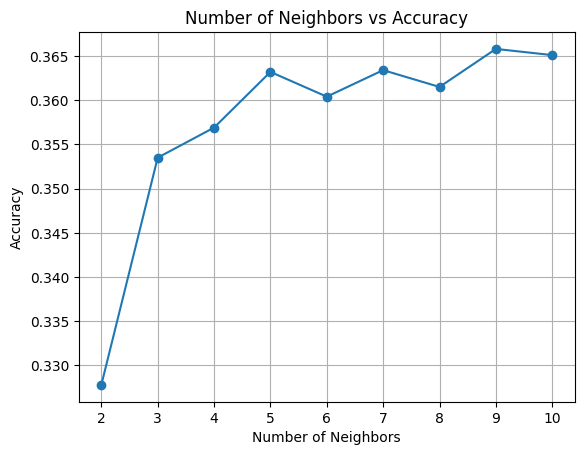

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
accuracies = []
for n in range(2, 11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_pca, y_train)
  knn_pred = knn.predict(X_test_pca)
  accuracies.append(accuracy_score(y_test, knn_pred))
plt.plot(range(2, 11), accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Number of Neighbors vs Accuracy')
plt.grid(True)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
knn_pred = knn.predict(X_test_pca)
knn_prob = knn.predict_proba(X_test_pca)
report("K-Means", y_test, knn_pred, knn_prob)

Results of K-Means:
Accuracy: 0.36
Log Loss (Cross-Entropy Loss): 12.2753
Confusion Matrix:
[[570   8 108  14  56   5  29   5 199   6]
 [138 261  94  35 132  25  78  14 195  28]
 [110   3 456  44 229  28  78  14  37   1]
 [ 75  10 219 202 185 105 135  22  40   7]
 [ 77   2 257  33 498  18  62  13  39   1]
 [ 63   6 221 149 170 227 101  19  39   5]
 [ 22   1 249  56 276  25 348   2  20   1]
 [107  11 156  41 259  50  76 246  48   6]
 [145  20  55  36  59  16  16   7 636  10]
 [156  85  88  43 102  24  76  27 207 192]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.39      0.57      0.46      1000
  automobile       0.64      0.26      0.37      1000
        bird       0.24      0.46      0.31      1000
         cat       0.31      0.20      0.24      1000
        deer       0.25      0.50      0.34      1000
         dog       0.43      0.23      0.30      1000
        frog       0.35      0.35      0.35      1000
       horse       0.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Fully Connected Network
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=20, random_state=42)
mlp.fit(X_train_pca, y_train)
mlp_pred = mlp.predict(X_test_pca)
mlp_prob = mlp.predict_proba(X_test_pca)
report("Fully Connected Network", y_test, mlp_pred, mlp_prob)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Results of Fully Connected Network:
Accuracy: 0.56
Log Loss (Cross-Entropy Loss): 1.7521
Confusion Matrix:
[[661  23  48  18  41  11  21  26 107  44]
 [ 47 651  19  28  15  13  18  15  58 136]
 [ 91  14 414  97 128  81  81  55  19  20]
 [ 28  25  98 384  72 189 101  53  26  24]
 [ 36   9 113  82 511  56  82  69  27  15]
 [ 26  14  91 202  68 441  59  66  16  17]
 [ 16  21  76  90  70  50 629  14   9  25]
 [ 34  15  57  55  78  86  17 613  12  33]
 [110  48  19  30  24  14  12  10 688  45]
 [ 44 184  26  30  20  19  15  33  60 569]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.60      0.66      0.63      1000
  automobile       0.65      0.65      0.65      1000
        bird       0.43      0.41      0.42      1000
         cat       0.38      0.38      0.38      1000
        deer       0.50      0.51      0.50      1000
         dog       0.46      0.44      0.45      1000
        frog       0.61      0.63      0.62      1000
      

In [ ]:
from sklearn.neural_network import MLPClassifier
# Fully Connected Network without PCA
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=20, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_prob = mlp.predict_proba(X_test)
report("Fully Connected Network Without PCA", y_test, mlp_pred, mlp_prob)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Results of Fully Connected Network Without PCA:
Accuracy: 0.50
Log Loss (Cross-Entropy Loss): 1.4166
Confusion Matrix:
[[560  29  96  13  15  20   9  25 157  76]
 [ 42 588  30  23  12  24   7  23  63 188]
 [ 69  15 528  68  61 103  44  55  23  34]
 [ 46  12 144 308  28 264  62  49  26  61]
 [ 60  11 281  57 314  67  57  96  34  23]
 [ 23  10 162 155  46 447  36  66  25  30]
 [ 12  12 162 113  87 111 424  25  23  31]
 [ 29  14  97  56  66 106   6 553  14  59]
 [ 84  69  29  20  16  41   2  11 653  75]
 [ 32 158  23  30  12  27  11  33  54 620]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.59      0.56      0.57      1000
  automobile       0.64      0.59      0.61      1000
        bird       0.34      0.53      0.41      1000
         cat       0.37      0.31      0.33      1000
        deer       0.48      0.31      0.38      1000
         dog       0.37      0.45      0.40      1000
        frog       0.64      0.42      0.51     

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")


Epoch 1, Loss: 1.4587
Epoch 2, Loss: 1.0922
Epoch 3, Loss: 0.9301
Epoch 4, Loss: 0.8303
Epoch 5, Loss: 0.7471


In [ ]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        outputs = model(inputs)  # raw logits
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())
report("Simple CNN:", y_test, all_preds, all_probs)


Results of Simple CNN::
Accuracy: 0.70
Log Loss (Cross-Entropy Loss): 0.8677
Confusion Matrix:
[[794  23  41   4  14   8  15   6  40  55]
 [ 18 845   6   5   0   2   8   4  18  94]
 [ 80   7 568  21 104  54  95  33  10  28]
 [ 23  22  98 338 102 178 159  33  18  29]
 [ 33   5  64  15 670  22 107  61  16   7]
 [ 18   8  69  99  64 592  82  45   9  14]
 [  6   7  30  14  31   9 881   5   7  10]
 [ 18   6  41  13  60  50  22 758   3  29]
 [ 77  61  15   4   7   6   8   3 770  49]
 [ 27  83   9   5  11   2  10  13  16 824]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.73      0.79      0.76      1000
  automobile       0.79      0.84      0.82      1000
        bird       0.60      0.57      0.59      1000
         cat       0.65      0.34      0.45      1000
        deer       0.63      0.67      0.65      1000
         dog       0.64      0.59      0.62      1000
        frog       0.64      0.88      0.74      1000
       horse      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [ ]:
!pip install blitz-bayesian-pytorch
from blitz.modules import BayesianLinear, BayesianConv2d
from blitz.utils import variational_estimator

@variational_estimator
class BayesianCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = BayesianConv2d(3, 32, kernel_size=(3, 3), padding=(1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = BayesianConv2d(32, 64, kernel_size=(3, 3), padding=(1, 1))

        self.fc1 = BayesianLinear(64 * 8 * 8, 128)
        self.fc2 = BayesianLinear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)


In [ ]:
model = BayesianCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        loss = model.sample_elbo(
            inputs=inputs,
            labels=labels,
            criterion=criterion,
            sample_nbr=3,
            complexity_cost_weight=1 / len(trainset)
        )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")


Epoch 1, Loss: 46.7938
Epoch 2, Loss: 42.1111
Epoch 3, Loss: 38.7073
Epoch 4, Loss: 35.4635
Epoch 5, Loss: 32.3002


In [ ]:
model.eval()
all_probs = []
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)

        outputs = torch.stack([torch.softmax(model(inputs), dim=1) for _ in range(5)])
        probs = torch.mean(outputs, dim=0).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

report("BNN:", y_test, all_preds, all_probs)


Results of BNN::
Accuracy: 0.63
Log Loss (Cross-Entropy Loss): 1.0369
Confusion Matrix:
[[778   6  16  24   6   2   1  12 133  22]
 [ 54 685   5  19   0   4   0   9  77 147]
 [125   7 513 114  35  35  17  90  48  16]
 [ 41   8  63 617  29  78  10  71  55  28]
 [ 57   2 144 106 406  15  13 194  54   9]
 [ 27   4  55 300  14 417   4 124  42  13]
 [ 14   7 100 234  45  17 498  32  30  23]
 [ 30   2  17  63  14  27   1 805  17  24]
 [ 53  27   5  12   1   1   0   7 876  18]
 [ 54  48   6  19   2   3   0  19  95 754]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.63      0.78      0.70      1000
  automobile       0.86      0.69      0.76      1000
        bird       0.56      0.51      0.53      1000
         cat       0.41      0.62      0.49      1000
        deer       0.74      0.41      0.52      1000
         dog       0.70      0.42      0.52      1000
        frog       0.92      0.50      0.65      1000
       horse       0.59  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [ ]:
# Logistic Regression with 40 components
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
y_prob = clf.predict_proba(X_test_pca)
report("Logistic Regression: ", y_test, y_pred, y_prob)

Results of Logistic Regression: :
Accuracy: 0.37
Log Loss (Cross-Entropy Loss): 1.8053
Confusion Matrix:
[[461  55  54  32  16  23  25  51 211  72]
 [ 68 423  38  55  15  34  71  42  82 172]
 [114  48 231  92 121  82 158  78  54  22]
 [ 43  88  96 241  52 197 109  76  37  61]
 [ 57  36 152  66 266  75 202  95  27  24]
 [ 36  48 112 160  61 330 104  79  50  20]
 [ 17  64  90 110  90  88 451  42  13  35]
 [ 47  55  75  71 109  70  72 369  48  84]
 [152  82  23  29   7  47  11  30 493 126]
 [ 73 174  17  39  15  18  50  50 103 461]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.43      0.46      0.45      1000
  automobile       0.39      0.42      0.41      1000
        bird       0.26      0.23      0.24      1000
         cat       0.27      0.24      0.25      1000
        deer       0.35      0.27      0.30      1000
         dog       0.34      0.33      0.34      1000
        frog       0.36      0.45      0.40      1000
       h

n:10
n:20
n:30
n:40
n:50
n:60
n:70
n:80
n:90
n:100
n:110
n:120
n:130
n:140
n:150
n:160
n:170
n:180
n:190
n:200


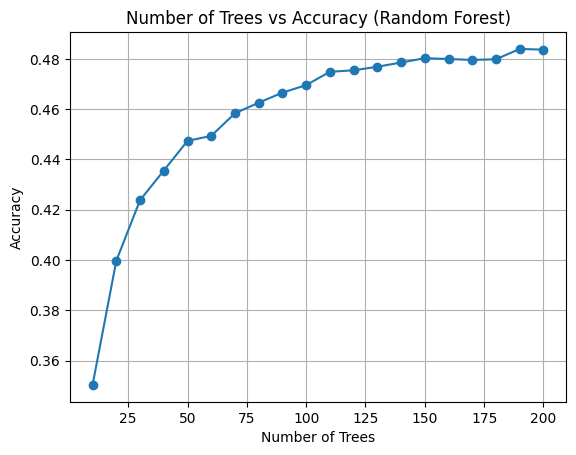

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with 40 components
accuracies = []
tree_counts = np.arange(10, 210, 10)
for n in tree_counts:
  rf = RandomForestClassifier(n_estimators=n, random_state=42)
  rf.fit(X_train_pca, y_train)
  rf_pred = rf.predict(X_test_pca)
  print(f"n:{n}")
  accuracies.append(accuracy_score(y_test, rf_pred))
plt.plot(tree_counts, accuracies, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees vs Accuracy (Random Forest)')
plt.grid(True)
plt.show()


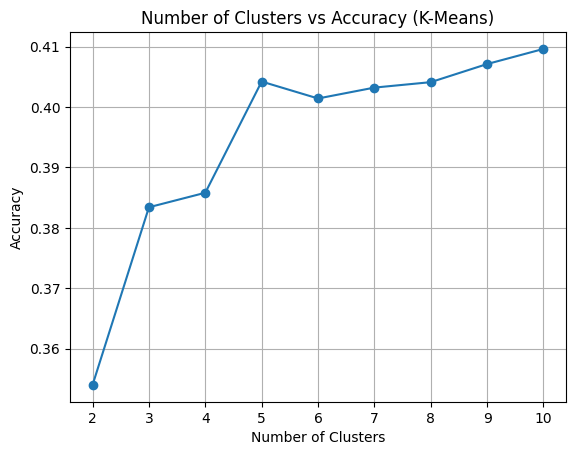

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN with 40 components
accuracies = []
for n in range(2, 11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_pca, y_train)
  knn_pred = knn.predict(X_test_pca)
  accuracies.append(accuracy_score(y_test, knn_pred))
plt.plot(range(2, 11), accuracies, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Number of Clusters vs Accuracy (K-Means)')
plt.grid(True)
plt.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

model = vgg16(pretrained=False)
model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss / len(trainloader):.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1 loss: 1.5209
Epoch 2 loss: 0.9356
Epoch 3 loss: 0.6444
Epoch 4 loss: 0.4134
Epoch 5 loss: 0.2272


In [ ]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())
report("Vgg16:", y_test, all_preds, all_probs)


Results of Vgg16::
Accuracy: 0.78
Log Loss (Cross-Entropy Loss): 0.7867
Confusion Matrix:
[[770   4  69  25  23   7   8   7  69  18]
 [ 16 794  11  10   3   7  14   4  72  69]
 [ 26   0 742  50  66  62  30  17   6   1]
 [ 11   2  78 601  33 188  48  25  10   4]
 [  4   1  56  93 728  45  29  37   7   0]
 [  2   0  46 135  26 730  22  31   8   0]
 [  3   0  47  51  19  29 847   1   3   0]
 [  5   0  35  39  43  56   2 818   2   0]
 [ 28   3  15  16   7   3   6   3 908  11]
 [ 13  20  17  20   9  12   9  22  41 837]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.77      0.82      1000
  automobile       0.96      0.79      0.87      1000
        bird       0.66      0.74      0.70      1000
         cat       0.58      0.60      0.59      1000
        deer       0.76      0.73      0.74      1000
         dog       0.64      0.73      0.68      1000
        frog       0.83      0.85      0.84      1000
       horse       0.85

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [ ]:
from torchvision.models import resnet18

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

model.train()
for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss / len(trainloader):.4f}")



Epoch 1 loss: 1.2709
Epoch 2 loss: 0.8276
Epoch 3 loss: 0.6106
Epoch 4 loss: 0.4498
Epoch 5 loss: 0.3059
Epoch 6 loss: 0.1937
Epoch 7 loss: 0.1113
Epoch 8 loss: 0.0801
Epoch 9 loss: 0.0757


In [ ]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())
report("Resnet18:", y_test, all_preds, all_probs)


Results of Resnet18::
Accuracy: 0.76
Log Loss (Cross-Entropy Loss): 0.7583
Confusion Matrix:
[[881  18  25   0   8   1  12   0  37  18]
 [  8 958   1   1   1   0   9   1   3  18]
 [ 72   6 770   5  54  13  60   5   5  10]
 [ 61  19 128 433 103  91 104  21  16  24]
 [ 22   8  90   9 799   7  50  10   4   1]
 [ 30  12 102  76  82 600  61  21   3  13]
 [  9   7  44  11  35   3 883   2   4   2]
 [ 52  23  58  11 116  32  20 655   3  30]
 [ 81  47   6   1   5   0  14   2 823  21]
 [ 35 132   5   1   1   1   4   0   9 812]]
Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.88      0.78      1000
  automobile       0.78      0.96      0.86      1000
        bird       0.63      0.77      0.69      1000
         cat       0.79      0.43      0.56      1000
        deer       0.66      0.80      0.73      1000
         dog       0.80      0.60      0.69      1000
        frog       0.73      0.88      0.80      1000
       horse       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
